In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [32]:
data = pd.read_csv('car_data/auto-mpg.data')
data = data[data.mpg != 0]

# Convert values in the 'mpg' column based on the given conditions
data['mpg'] = data['mpg'].apply(lambda x: 0 if x < 20 else (1 if x < 30 else 2))

data = data.dropna()
data = data.drop('car_name', axis=1)

predictors = data.drop("mpg",axis=1)
target = data["mpg"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [33]:
from sklearn.svm import SVC

svc = SVC(random_state=0)
search_space = {
    'gamma': ['linear', 'scale'],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [34]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(svc, search_space, verbose=0, refit=True, n_jobs=-1)
best_model = clf.fit(X_train, Y_train)
print('complete')

complete


/home/lucmac/anaconda3/envs/asn1/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/home/lucmac/anaconda3/envs/asn1/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lucmac/anaconda3/envs/asn1/lib/python3.10/site-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/home/lucmac/anaconda3/envs/asn1/lib/python3.10/site-packages/sklearn/base.py", line 570, in _validate_params
    validate_para

In [19]:
print('Best kernel:', best_model.best_estimator_.get_params()['kernel'])
print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])

Best kernel: rbf
Best gamma: scale


In [20]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model.best_estimator_, X_train, Y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[np.linspace(0.01, 1.0, 50)], verbose=1, random_state=42)

[learning_curve] Training set sizes: [  2   7  12  17  23  28  33  38  43  48  53  58  64  69  74  79  84  89
  94 100 105 110 115 120 125 130 135 141 146 151 156 161 166 171 177 182
 187 192 197 202 207 212 218 223 228 233 238 243 248 254]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.6s finished


In [36]:
print(test_scores[~np.isnan(test_scores)].max())

0.7301587301587301


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = best_model.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[26  6  0]
 [ 2 25  0]
 [ 0 21  0]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.48      0.93      0.63        27
           2       0.00      0.00      0.00        21

    accuracy                           0.64        80
   macro avg       0.47      0.58      0.50        80
weighted avg       0.53      0.64      0.56        80



/home/lucmac/anaconda3/envs/asn1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lucmac/anaconda3/envs/asn1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lucmac/anaconda3/envs/asn1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=Y_test, y_pred=y_pred, average='macro'))
print('Recall: %.3f' % recall_score(y_true=Y_test, y_pred=y_pred, average='macro'))
print('F1: %.3f' % f1_score(y_true=Y_test, y_pred=y_pred, average='macro'))

NameError: name 'y_pred' is not defined

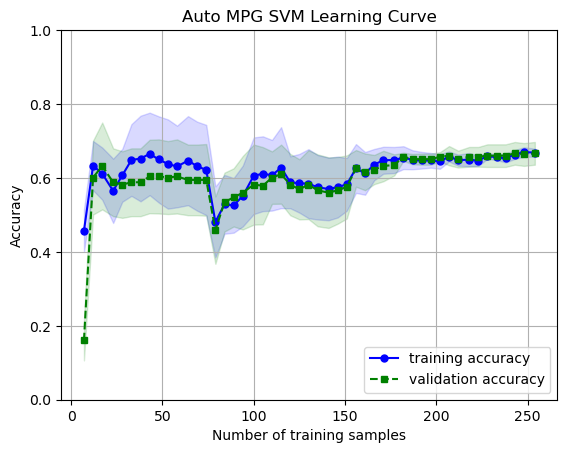

In [29]:
import matplotlib.pyplot as plt

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Auto MPG SVM Learning Curve')
plt.legend(loc='lower right')
plt.ylim([0.0, 1.0])
plt.show()

In [24]:
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, -1, 5)
val_train_scores, val_test_scores = validation_curve(best_model.best_estimator_, X_train, Y_train, param_name='gamma', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(val_train_scores, axis=1)
train_std = np.std(val_train_scores, axis=1)
test_mean = np.mean(val_test_scores, axis=1)
test_std = np.std(val_test_scores, axis=1)

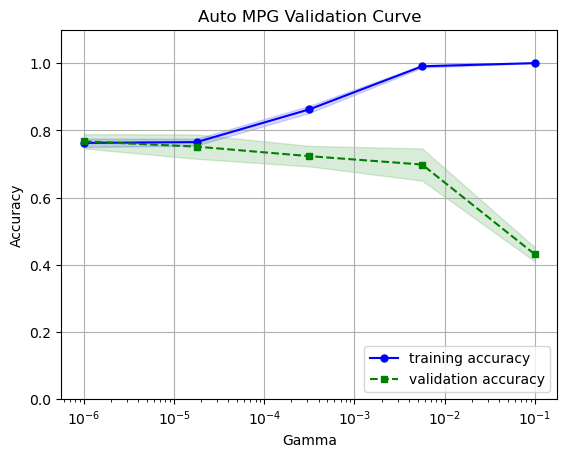

In [28]:
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('Auto MPG Validation Curve')
plt.ylim([0.0, 1.1])
plt.show()